## Libraries

In [1]:
# Basic
import pandas as pd
import numpy as np
import os
import kagglehub

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import transformers
from transformers import pipeline

# download nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\boss2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\boss2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load Dataset

In [2]:
# Download latest version
path = kagglehub.dataset_download("jillanisofttech/fake-or-real-news")

In [3]:
data = pd.read_csv(os.path.join(path, 'fake_or_real_news.csv'))
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

## Basic EDA

<Axes: xlabel='label'>

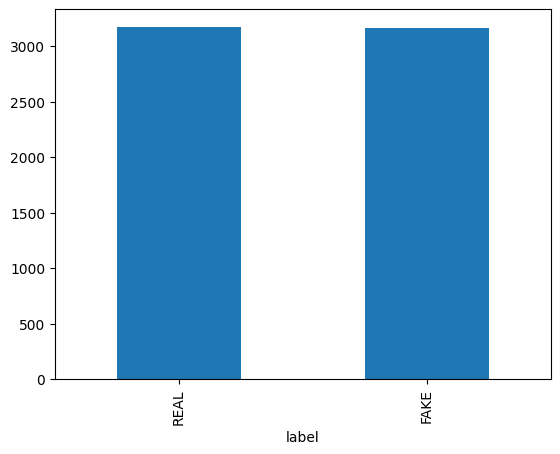

In [6]:
data['label'].value_counts().plot(kind='bar')

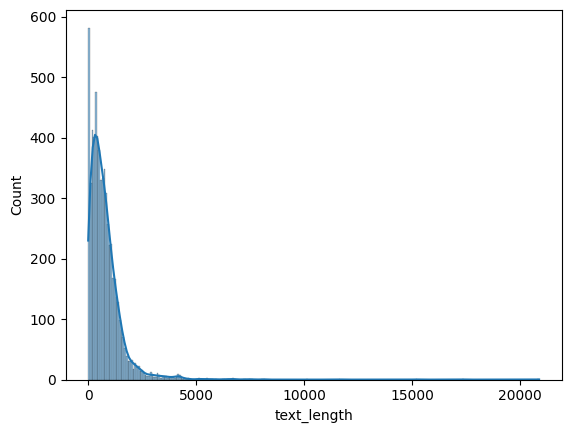

In [7]:
data['text_length'] = data['text'].apply(lambda text: len(text.split()))
sns.histplot(
    x=data['text_length'],
    kde=True,
)
plt.show()

## Text Preprocessing 

In [8]:
lemmatizer = WordNetLemmatizer()
en_stopwords = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'b(?:https?://|www\.)\S+\b','',text)
    text = re.sub(r'[^\w\s]','', text)
    text = [word for word in text.split() if word not in en_stopwords]
    text = [lemmatizer.lemmatize(word) for word in text]
    

    return ' '.join(text)

data['cleaned_text'] = data['text'].apply(lambda text: clean_text(text))

data.head()

,Unnamed: 0,title,text,label,text_length,cleaned_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1296,daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,446,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,431,u secretary state john f kerry said monday sto...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,404,kaydee king kaydeeking november 9 2016 lesson ...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,317,primary day new york frontrunners hillary clin...


## Train-test Split

In [9]:
X = data['cleaned_text']
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=25)

## Modelling

### Naive Bayes Classifier

In [10]:
model_nb = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('clf', MultinomialNB())
])

model_nb.fit(X_train, Y_train)
pred_nb = model_nb.predict(X_test)

print("== Logistic Regression Model ==")
print(f"Accuracy: {round(accuracy_score(pred_nb, Y_test)*100,2)}%")
print("Classification Report:\n", classification_report(pred_nb, Y_test))

== Logistic Regression Model ==
Accuracy: 82.8%
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.65      0.99      0.78       603
        REAL       0.99      0.75      0.86      1298

    accuracy                           0.83      1901
   macro avg       0.82      0.87      0.82      1901
weighted avg       0.88      0.83      0.83      1901



### Logistic Regression classifier

In [11]:
model_lr = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000))
])

model_lr.fit(X_train, Y_train)
pred_lr = model_lr.predict(X_test)

print("== Logistic Regression Model ==")
print(f"Accuracy: {round(accuracy_score(pred_lr, Y_test)*100,2)}%")
print("Classification Report:\n", classification_report(pred_lr, Y_test))

== Logistic Regression Model ==
Accuracy: 91.43%
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.92      0.90      0.91       933
        REAL       0.91      0.93      0.92       968

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901



### Linear Support Vector Machine Classifier

In [12]:
model_svm = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('clf', LinearSVC())
])

model_svm.fit(X_train, Y_train)
pred_svm = model_svm.predict(X_test)

print("== Logistic Regression Model ==")
print(f"Accuracy: {round(accuracy_score(pred_svm, Y_test)*100,2)}%")
print("Classification Report:\n", classification_report(pred_svm, Y_test))

== Logistic Regression Model ==
Accuracy: 94.16%
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       921
        REAL       0.94      0.95      0.94       980

    accuracy                           0.94      1901
   macro avg       0.94      0.94      0.94      1901
weighted avg       0.94      0.94      0.94      1901



## Save the model

In [13]:
import joblib

joblib.dump(model_svm, "Fake_news_classification.pkl")

['Fake_news_classification.pkl']

## Getting the news text

In [14]:
news = """During the hearing, the ASG said that intellectuals, when they become terrorists, are more harmful than ground-level terrorists. “Intellectuals who got degrees with state support, who used state funding to become doctors, and then use it for nefarious activities — they are much more dangerous," he said. Raju argued that the delay in the trial court proceedings has been caused by the accused. “What does the lead member of this conspiracy say? He does not call it a protest — he calls it a violent protest. He says Assam should be separated from India. He refers to the ‘chicken neck’, the 16 km stretch of land that connects Assam to India. He talks about Kashmir. He is trying to provoke the Muslims. Then he speaks about triple talaq and even maligns the court. He says, ‘Court ki naani yaad kara denge. ’ He talks about the Babri Masjid. So, the ultimate aim is regime change," ASG Raju told the court. The ASG also played speeches of Sharjeel Imam in the apex court and said these were inflammatory speeches. Sharjeel Iman, former JNU student leader Umar Khalid, Gulfisha Fatima, and Meeran Haider were booked under the Unlawful Activities (Prevention) Act (UAPA) and provisions of the erstwhile IPC for allegedly being the “masterminds" of the 2020 Delhi riots, which left 53 people dead and over 700 injured. The Delhi High Court had earlier denied bail to nine people, including Sharjeel Imam and Umar Khalid, saying “conspiratorial" violence under the garb of demonstrations or protests by citizens could not be allowed. The activists moved the Supreme Court against the HC order."""
news

'During the hearing, the ASG said that intellectuals, when they become terrorists, are more harmful than ground-level terrorists. “Intellectuals who got degrees with state support, who used state funding to become doctors, and then use it for nefarious activities — they are much more dangerous," he said. Raju argued that the delay in the trial court proceedings has been caused by the accused. “What does the lead member of this conspiracy say? He does not call it a protest — he calls it a violent protest. He says Assam should be separated from India. He refers to the ‘chicken neck’, the 16 km stretch of land that connects Assam to India. He talks about Kashmir. He is trying to provoke the Muslims. Then he speaks about triple talaq and even maligns the court. He says, ‘Court ki naani yaad kara denge. ’ He talks about the Babri Masjid. So, the ultimate aim is regime change," ASG Raju told the court. The ASG also played speeches of Sharjeel Imam in the apex court and said these were inflam

## Getting the trained model and Make predictions

In [15]:
import joblib

model = joblib.load('Fake_news_classification.pkl')

predicted_label = model.predict([news])
print(f"Given News is a '{predicted_label[0]}' news")

Given News is a 'REAL' news
